$
\newcommand{\X}{\mathtt{X}} %Matrice de Pauli X
\newcommand{\W}{\mathtt{W}}
\newcommand{\Y}{\mathtt{Y}} %Matrice de Pauli Y
\newcommand{\Z}{\mathtt{Z}} %Matrice de Pauli Z
\newcommand{\I}{\mathbb{I}} %Opérateur Identité I
\newcommand{bra}[1]{\langle#1\vert} %bra
\newcommand{ket}[1]{\vert#1\rangle} %ket
\newcommand{\proj}[1]{\ket{#1}\bra{#1}} % Projecteur
\newcommand{\av}[1]{\langle#1\rangle} % average
\newcommand{\mel}[3]{\bra{#1}#2\ket{#3}} %Matrix element
\newcommand{\bk}[2]{\langle#1\ket{#2}} %Scalar product
$

\title{TUTORIEL 2 SUR QISKIT : PORTES LOGIQUES QUANTIQUES USUELLES SUR QISKIT}
\author{}
\maketitle

<section class="post-featured-photo" style="background:linear-gradient(rgba(18, 50, 99, 0.9), rgba(12, 69, 138, 0.5)), no-repeat top; background-size:cover;">
    <font color="yellow" >
    <ol>
        Orlane Zang, orlane.zang@facsciences.cm
    </ol>
    </font>
    <font color="white" >
    <ul><li>Department of Physics, Faculty of Science, University of Yaounde I</li></ul>
        <ul><li> Quantum optics research team of UYI, Neo-Quanticians
        </font>       


<div class="alert alert-info">
    
![logo Qiskit!]( ./Graphics/logo.png "This is the logo" )
    
</div>




# ACQUIS
   <div class="alert alert-warning">
   <strong>
      <ul><li> Savoir implémenter les portes logiques usuelles sur Qiskit </li></ul>
           </strong>
</div>

In [6]:
import numpy as np #Pour les claculs numériques
from qiskit import (QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer) #Contient toutes vos opérations quantiques, Aer gère les backends des simulateurs, "execute" exécute le circuit
from qiskit.tools.visualization import circuit_drawer, array_to_latex #circuit_drawer dessine le circuit et array_to_latex écrit les tableaux sous forme LaTeX
from qiskit.providers.aer import QasmSimulator #Pour le simulateur de circuits haute performance d'Aer
from qiskit.visualization import plot_histogram #Pour la création de vos histogrammes

In [2]:
np.set_printoptions(precision=4, suppress=True) #Cette ligne est importatnte pour la précision numérique sur Python




Maintenant que nous avons vu comment construire, exécuter et visualiser un circuit quantique élémentaire, nous allons présenter l'implémentation de certaines portes logiques sur Qiskit.

Sur Qiskit, les portes single utilisables sont **les portes u, la porte identité, les portes de Pauli, de Clifford, les portes `C3` *et les portes de rotations standard*.** Comme on l'a dit plus haut, le backend `unitary_simulator` nous permettra à chaque fois d'écire les représentations matricielles de chaque porte.

<div class="alert alert-warning">
  <strong>
      <ul><li> Une autre notion que nous aboderons est celle de fidélité. La fidélité entre deux états d'opérateur statistique $\rho$ et $\sigma$ mesure le recouvrement entre l’état d’entrée $\rho$ et l’état de sortie $\sigma$ et est définie par: </li></ul>
 </strong>
</div>

\begin{equation}
F(\rho, \sigma) = Tr (\sqrt{\sqrt{\rho} \sigma \sqrt{\rho}}
\end{equation}

Si les deux états sont purs, sachant que $\rho = \proj{\psi}$ et $\sigma = \proj{\phi}$ elle se résume à : 


\begin{equation}
F(\rho, \sigma) = |\bk{\psi}{\phi}|^{2}
\end{equation}


# Introduction
Nous savons qu'un single qubit s'écrit sous la forme générale:

\begin{equation}
\ket{\psi}=\cos\frac{\theta}{2}\ket{0}+\sin\frac{\theta}{2}e^{i\phi}\ket{1}
\end{equation}
La matrice unitaire U représentant générallement un single qubit est donnée par 

\begin{equation}\label{eq:UGenriq}
U(\theta,\phi,\lambda)=R_z(\phi)R_y(\theta)R_z(\lambda)
=\begin{pmatrix}\cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2}
\\e^{i\phi}\sin\frac{\theta}{2} &e^{i(\lambda+\phi)}\cos\frac{\theta}{2}\end{pmatrix}.
\end{equation}

Où $0\leq\lambda\leq 2\pi$, $R_x$, $R_y$ and $R_z$ sont des portes de rotation autour des axes $x, y, z$ respectivement , et leurs représentations matricielles sont données par:

\begin{align}
&R_x(\phi)=\begin{pmatrix}\cos\frac{\phi}{2} & -i\sin\frac{\phi}{2}
\\-i\sin\frac{\phi}{2} &\cos\frac{\phi}{2}\end{pmatrix},
&&R_y(\theta)=\begin{pmatrix}\cos\frac{\theta}{2} & -\sin\frac{\theta}{2}
\\\sin\frac{\theta}{2} &\cos\frac{\theta}{2}\end{pmatrix},
&R_z(\lambda)=\begin{pmatrix}e^{-i\frac{\lambda}{2}} & 0
\\0 &e^{+i\frac{\lambda}{2}}\end{pmatrix}.
\end{align}

# Implémentation avec Qiskit

Nous allons montrer ci-dessous comment implémenter une porte logique quantique avec qiskit. Pour cela, nous allons d'abord définir un régistre quantique à un fil que nous utiliserons pour les autres portes.


In [7]:
qr1=QuantumRegister(1)

## Portes Single-qubit

### La porte U

Nous allons définir un circuit quantique constitué de ce régistre quantique, à ce circuit nous allons ajouter une porte u effectuant une rotation d'angle $\frac{\pi}{2}$ autour des trois axes $x, y, z$. Enfin, nous allons visualiser notre circuit:

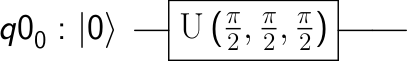

In [8]:
qcu = QuantumCircuit(qr1)
qcu.u(np.pi/2,np.pi/2,np.pi/2,qr1)
qcu.draw('latex', initial_state=True)

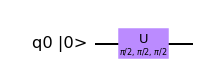

In [9]:
qcu.draw('mpl', initial_state=True)

In [10]:
qcu.draw(initial_state=True)

┌────────────────┐
q0_0: |0>┤ U(π/2,π/2,π/2) ├
         └────────────────┘

* Ecrivons maintenant la matrice représentant l'opérateur de la porte u. Pour ça, nous allons utiliser la syntaxe utilisée plus haut avec le simulateur `unitary`.

In [34]:
u = Operator(qcu)
array_to_latex(u, prefix='u(\\pi/2,\\pi/2,\\pi/2) = ')

<IPython.core.display.Latex object>

### La porte phase-Shift

La porte phase-Shift est la porte de rotation u réduite à $\theta=0, \phi=0$, c'est-à-dire:

\begin{equation}
\mathtt{P}(\lambda)= \mathtt{U}(0,0,\lambda) = \begin{pmatrix}
                1 & 0\\
                0 & e^{i\lambda}
            \end{pmatrix}
\end{equation}. 

Donc on la définit comme suit:

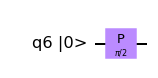

In [171]:
qps = QuantumCircuit(qr1)
qps.p(np.pi/2,qr1) #lambda = pi/2
qps.draw('mpl', initial_state=True)

In [36]:
ps=Operator(qps)
array_to_latex(ps, prefix='u(0,0,\\pi/2) = ')

<IPython.core.display.Latex object>

### La porte identité

La porte identité est celle de rotation réduite à tous les angles nuls. 

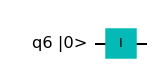

In [37]:
qi = QuantumCircuit(qr1)
qi.id(qr1)
qi.draw('mpl', initial_state=True)

In [38]:
i=Operator(qi)
array_to_latex(i, prefix='u(0,0,0) = ')

<IPython.core.display.Latex object>

### Les portes de PAULI

Les portes de Pauli sont les représentations symboliques des matrices de Pauli $\X, \Y, \Z$ et ce sont des portes u réduites, telles que:


\begin{equation}
\X =  \begin{pmatrix} 
0 & 1 \\ 1 & 0
\end{pmatrix} = \mathtt{U}(\pi,0,\pi), 
\end{equation}



\begin{equation}
 \Y = \begin{pmatrix} 
0 & -i \\ i & 0 \end{pmatrix}=\mathtt{U}\left(\pi,\frac{\pi}{2},\frac{\pi}{2}\right),
\end{equation}



\begin{equation}
\Z = \begin{pmatrix} 
1 & 0 \\ 0 & -1 \end{pmatrix} = \mathtt{p}(\pi)
\end{equation}

Avec Qiskit on aura:

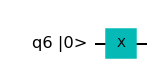

In [39]:
qx = QuantumCircuit(qr1)
qx.x(qr1)
qx.draw('mpl', initial_state=True)

In [40]:
x=Operator(qx)
array_to_latex(x, prefix='\\X = ')

<IPython.core.display.Latex object>

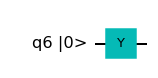

In [41]:
qy = QuantumCircuit(qr1)
qy.y(qr1)
qy.draw('mpl', initial_state=True)

In [42]:
y=Operator(qy)
array_to_latex(y, prefix='\\Y = ')

<IPython.core.display.Latex object>

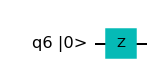

In [43]:
qz = QuantumCircuit(qr1)
qz.z(qr1)
qz.draw('mpl', initial_state=True)

In [44]:
z=Operator(qz)
array_to_latex(z, prefix='\\Z = ')

<IPython.core.display.Latex object>

### Les portes de CLIFFORD

Parmi les portes de Clifford, nous avons:


1. La porte de Walsh-Hadamard:
\begin{equation}
        \mathtt{H}=\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1 \end{pmatrix}=\mathtt{U}(\frac{\pi}{2},0,\pi)
        \end{equation}

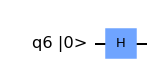

In [45]:
qh = QuantumCircuit(qr1)
qh.h(qr1)
qh.draw('mpl', initial_state=True)

In [46]:
h = Operator(qh)
array_to_latex(h, prefix='H = ')

<IPython.core.display.Latex object>

2.  La porte $\mathtt{S}$ (ou $\sqrt{\mathtt{Z}}$ phase) :


 \begin{equation}
        \mathtt{S}=\begin{pmatrix} 1 & 0\\0 & i \end{pmatrix}=\mathtt{p}\left(\frac{\pi}{2}\right);
    \end{equation}

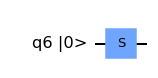

In [47]:
qs = QuantumCircuit(qr1)
qs.s(qr1)
qs.draw('mpl', initial_state=True)

In [48]:
s = Operator(qs)
array_to_latex(s, prefix='S = ')

<IPython.core.display.Latex object>

3. La porte $\mathtt{S}^\dagger$ (ou la porte conjuguée $\sqrt{\mathtt{Z}}$) :
  \begin{equation}
        \mathtt{S}^\dagger=\begin{pmatrix} 1 & 0\\0 & -i \end{pmatrix}=\mathtt{P}\left(-\frac{\pi}{2}\right).
    \end{equation}

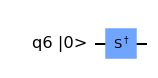

In [49]:
qsdg = QuantumCircuit(qr1)
qsdg.sdg(qr1)
qsdg.draw('mpl', initial_state=True)

In [50]:
sdg = Operator(qsdg)
array_to_latex(sdg, prefix='S^\\dagger = ')

<IPython.core.display.Latex object>

### Les portes C3



* La porte $\mathtt{T}$ (or $\sqrt{\mathtt{S}}$) :
    \begin{equation}
        \mathtt{T}=\begin{pmatrix} 1 & 0\\0 & e^{i\frac{\pi}{4}} \end{pmatrix}=\mathtt{P}\left(\frac{\pi}{4}\right);
    \end{equation}

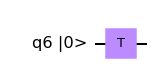

In [51]:
qt = QuantumCircuit(qr1)
qt.t(qr1)
qt.draw('mpl', initial_state=True)

In [52]:
t = Operator(qt)
array_to_latex(t, prefix='T = ')

<IPython.core.display.Latex object>

### Les portes de rotation Standards

Les portes de rotation définies plus haut vont être implémentées sur Qiskit. Avant, nous rappelons que:

\begin{equation}
        R_x(\theta)=\begin{pmatrix}\cos\frac{\theta}{2} & -i\sin\frac{\theta}{2}\\ -i\sin\frac{\theta}{2} & \cos\frac{\theta}{2}\end{pmatrix}=\mathtt{U}\left(\theta,-\frac{\pi}{2},\frac{\pi}{2}\right);
    \end{equation}
    
    
   \begin{equation}
        R_y(\theta)=\begin{pmatrix}\cos\frac{\theta}{2} & -\sin\frac{\theta}{2}\\ \sin\frac{\theta}{2} & \cos\frac{\theta}{2}\end{pmatrix}=\mathtt{U}\left(\theta,0,0\right);
    \end{equation}


\begin{equation}
      R_z(\phi)=\begin{pmatrix}e^{-i\frac{\phi}{2}} & 0\\ 0 & e^{i\frac{\phi}{2}}\end{pmatrix}\equiv\mathtt{P}(\phi);
    \end{equation}
    
    Sur Qiskit on aura donc:

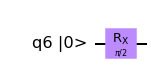

In [53]:
qrx = QuantumCircuit(qr1)
qrx.rx(np.pi/2,qr1)
qrx.draw('mpl', initial_state=True)

In [54]:
RX = Operator(qrx)
array_to_latex(RX, prefix='R_x(\\pi/2) = ')

<IPython.core.display.Latex object>

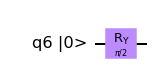

In [55]:
qry = QuantumCircuit(qr1)
qry.ry(np.pi/2,0)
qry.draw('mpl', initial_state=True)

In [56]:
RY = Operator(qry)
array_to_latex(RY, prefix='R_y(\\pi/2) = ')

<IPython.core.display.Latex object>

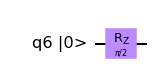

In [57]:
qrz = QuantumCircuit(qr1)
qrz.rz(np.pi/2,qr1)
qrz.draw('mpl', initial_state=True)

In [58]:
RZ = Operator(qrz)
array_to_latex(RZ, prefix='R_z(\\pi/2) = ')

<IPython.core.display.Latex object>

# PORTES MULTI-QUBIT SUR QISKIT


Comme nous l'avons présenté plus haut, les portes multi-qubit sont celles qui prennent en compte plus d'un qubit. Parmi ces portes nous avons:

* Les portes 2-qubits
  * Les portes controllées de Pauli, 
  * Les portes controllées de Hadamard, 
  * Les portes controllées de rotation, 
  * Les portes controllées phase, 
  * La porte controllée $\mathtt{U}$ et
  * La porte swap. 

* Les portes 3-qubits:
  * La porte de Toffoli 
  * La porte de Fredkin.
  
  ## Portes 2-qubits
  
  Comme nous l'avons déjà montré plus haut, la syntaxe d'ajout d'une porte 2-qubit est la suivante: 
  
  >`cu(qubit_controlle, qubit_cible)`
> ou
>
>`cu([angles], qubit_controlle, qubit_cible)`

* Nous allons donc tout d'abord définir un régistre quantique à 2 fils

In [59]:
qr2=QuantumRegister(2)

### Les portes controllées de PAULI



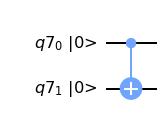

In [60]:
# Porte controllée CY
qcx = QuantumCircuit(qr2)
qcx.cx(qr2[0], qr2[1])
qcx.draw('mpl', initial_state=True)

In [61]:
CX = Operator(qcx)
array_to_latex(CX, prefix='CX = ')

<IPython.core.display.Latex object>

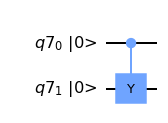

In [62]:
#Porte controllée CY
qcy = QuantumCircuit(qr2)
qcy.cy(qr2[0], qr2[1])
qcy.draw('mpl', initial_state=True)

In [63]:
CY = Operator(qcy)
array_to_latex(CY, prefix='CY = ')

<IPython.core.display.Latex object>

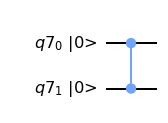

In [64]:
#Porte controllée CZ
qcz = QuantumCircuit(qr2)
qcz.cz(qr2[0], qr2[1])
qcz.draw('mpl', initial_state=True)

In [65]:
CZ = Operator(qcz)
array_to_latex(CZ, prefix='CZ = ')

<IPython.core.display.Latex object>

### La porte controllée de Hadamard

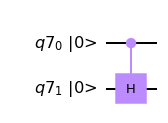

In [66]:
qrh = QuantumCircuit(qr2)
qrh.ch(qr2[0], qr2[1])
qrh.draw('mpl', initial_state=True)

In [67]:
CH = Operator(qrh)
array_to_latex(CH, prefix='CH = ')

<IPython.core.display.Latex object>

<div class="alert alert-warning">
  <strong>
  <ul><li> La syntaxe est la même pour les autres portes controllées. </li></ul>  
    </strong>
</div>

**REMARQUE TRES IMPORTANTE: Lorsque l'on déclare une porte controllée comme nous l'avons fait plus haut, les qubits de controle sont par défaut dans l'état $1$, alors à chaque fois la porte agira sur le qubit cible. Une façon donc de changer le qubit controlle en 0 est la syntaxe suivante:**

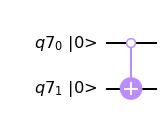

In [172]:
qcx1 = QuantumCircuit(qr2)
qcx1.cx(qr2[0], qr2[1], ctrl_state=0)
qcx1.draw('mpl', initial_state=True)

* Vous pouvez remarquer la différence avec le cicruit lorsque le qubit de controle est 1: Lorsque le controle est 1 il y a un **rond plein** dans la représentation symbolique et lorsque le qubit control est $0$, le **rond est vide**

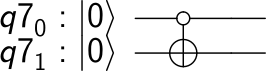

In [69]:
qcx1 = QuantumCircuit(qr2)
qcx1.cx(qr2[0], qr2[1], ctrl_state=0)
qcx1.draw('latex', initial_state=True)

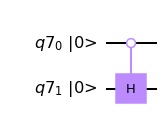

In [70]:
qcy1 = QuantumCircuit(qr2)
qcy1.ch(qr2[0], qr2[1], ctrl_state=0)
qcy1.draw('mpl', initial_state=True)

## Les portes 3-qubits

Définissons tout d'abord cette fois-ci un régistre quantique à 3 fils


In [71]:
qr3=QuantumRegister(3)

### Porte de TOFFOLI
La porte de Toffoli définit plus haut se déclare sur Qiskit comme suit:

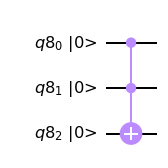

In [72]:
qccx = QuantumCircuit(qr3)
qccx.ccx(qr3[0], qr3[1], qr3[2])
qccx.draw('mpl', initial_state=True)

In [73]:
CCX = Operator(qccx)
array_to_latex(CCX, prefix='CCX = ')

<IPython.core.display.Latex object>

<div class="alert alert-warning">
  <strong>Contrairement aux portes de controle 2-qubit comme présenté, il n'est pas possible de changer les qubits de controle en utilisant ctrl_state. Mais il est possible de le faire en insérant d'abord des portes de Pauli X qui ont pour role de changer le 0 en 1 et le 1 en 0. De cette manière on peut changer la valeur du qubit de controlle en 1. Un peu comme suit: </strong>
</div>

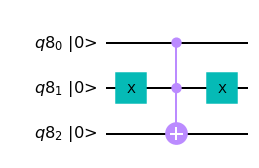

In [74]:
qccx2 = QuantumCircuit(qr3)

# Nous allons changer l'état du second qubit de control en le mettant dans l'état |1> 
qccx2.x(qr3[1])
qccx2.ccx(qr3[0], qr3[1], qr3[2])
qccx2.x(qr3[1])# Il est important de remettre le second qubit dans son état initial en mettant une autre porte X après la porte de TOFFOLI

qccx2.draw('mpl', initial_state=True)

## Porte de Fredkin

Cette porte est la porte de control **Swap**, elle permute plutôt le deuxième et le troisième qubit si le premier est $1$.

Exemple: 

$\ket{000} \rightarrow \ket{000}$, $\ket{011} \rightarrow \ket{101}$

Son implémentation sur Qiskit est la suivante:


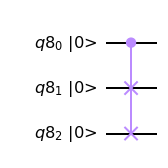

In [75]:
qcs = QuantumCircuit(qr3)
qcs.cswap(qr3[0], qr3[1], qr3[2])
qcs.draw('mpl', initial_state=True)

* Avec cette porte on peut changer le qubit de control avec `ctrl_state`

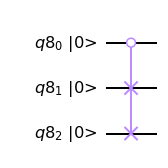

In [76]:
qcs1 = QuantumCircuit(qr3)
qcs1.cswap(qr3[0], qr3[1], qr3[2], ctrl_state=0)
qcs1.draw('mpl', initial_state=True)

In [11]:
import qiskit.tools.jupyter
%qiskit_version_table